<a href="https://colab.research.google.com/github/Tamtu55/MindMate/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["KAGGLE_USERNAME"]="tamanna240205"
os.environ["KAGGLE_KEY"]="d8dffbcea007971d9d47a1b86c89b198"
!kaggle datasets download ananyaroy1011/mental-health-data

  0% 0.00/1.48k [00:00<?, ?B/s]
100% 1.48k/1.48k [00:00<00:00, 2.38MB/s]


In [2]:
!unzip ananyaroy1011/mental-health-data.zip

unzip:  cannot find or open ananyaroy1011/mental-health-data.zip, ananyaroy1011/mental-health-data.zip.zip or ananyaroy1011/mental-health-data.zip.ZIP.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('/content/mental-health-data.zip')
data.head()

,Timestamp,Choose your gender,Age,What was your average weekly screentime? (in hours),Which app/feature did you use the most?,"On a scale of 1 (not at all) - 5(very frequently), indicate if you feel emotionally supported by others around you.",Did you take care of yourself this week?,Did you feel depressed a lot this week?,Did you feel anxious a lot this week?,Do you get Panic attacks frequently?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,7,Youtube,4,No,Yes,No,Yes,No
1,08-07-2020 12:04,Male,21.0,8,Youtube,4,Yes,No,Yes,No,No
2,08-07-2020 12:05,Male,19.0,4,Chrome,4,No,Yes,Yes,Yes,No
3,08-07-2020 12:06,Female,22.0,3,Youtube,2,Yes,Yes,No,No,No
4,08-07-2020 12:13,Male,23.0,2,Chrome,4,No,No,No,No,No


Data Cleaning


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             101 non-null    object 
 1   Choose your gender                                                                                                    101 non-null    object 
 2   Age                                                                                                                   100 non-null    float64
 3   What was your average weekly screentime? (in hours)                                                                   101 non-null    int64  
 4   Which ap

In [6]:
#drop NA value
data= data[data['Age'].notna()]
data.shape

(100, 11)

In [7]:
data.head(1)

,Timestamp,Choose your gender,Age,What was your average weekly screentime? (in hours),Which app/feature did you use the most?,"On a scale of 1 (not at all) - 5(very frequently), indicate if you feel emotionally supported by others around you.",Did you take care of yourself this week?,Did you feel depressed a lot this week?,Did you feel anxious a lot this week?,Do you get Panic attacks frequently?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,7,Youtube,4,No,Yes,No,Yes,No


In [8]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Screentime', 'Most used App', 'Emotional Support', 'Self Care', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Screentime,Most used App,Emotional Support,Self Care,Depression,Anxiety,Panic_Attack,Treatment
0,08-07-2020 12:02,Female,18.0,7,Youtube,4,No,Yes,No,Yes,No


In [9]:
#Formatting the Year column
data['Screentime'].unique()
# array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3'], dtype=object)

array([ 7,  8,  4,  3,  2,  5,  6, 10, 11, 12,  9,  1])

In [10]:
print(data["Screentime"][:3], "\n")

0    7
1    8
2    4
Name: Screentime, dtype: int64 



In [11]:
data['Most used App'].unique()

array(['Youtube', 'Chrome', 'DOTA', 'ChatGPT', 'Netflix', 'Prime',
       'Instagram', 'Snapchat'], dtype=object)

# Few findings
The CGPA column has ranges rather than an absolute value.
The range '3.50 - 4.00' is same as '3.50 - 4.00 ', so we need to trim the trailing whitespace.
The ranges can be converted to their mean values, but I will keep them as it is for further exploration.

In [12]:
print("First three values of CGPA after cleaning text:")
print(data["Depression"][:3], "\n")
print(data['Depression'].unique())

First three values of CGPA after cleaning text:
0    Yes
1     No
2    Yes
Name: Depression, dtype: object 

['Yes' 'No']


In [13]:
len(data['Treatment'].unique())

2

In [14]:
len(data['Gender'].unique())

2

Data Exploration

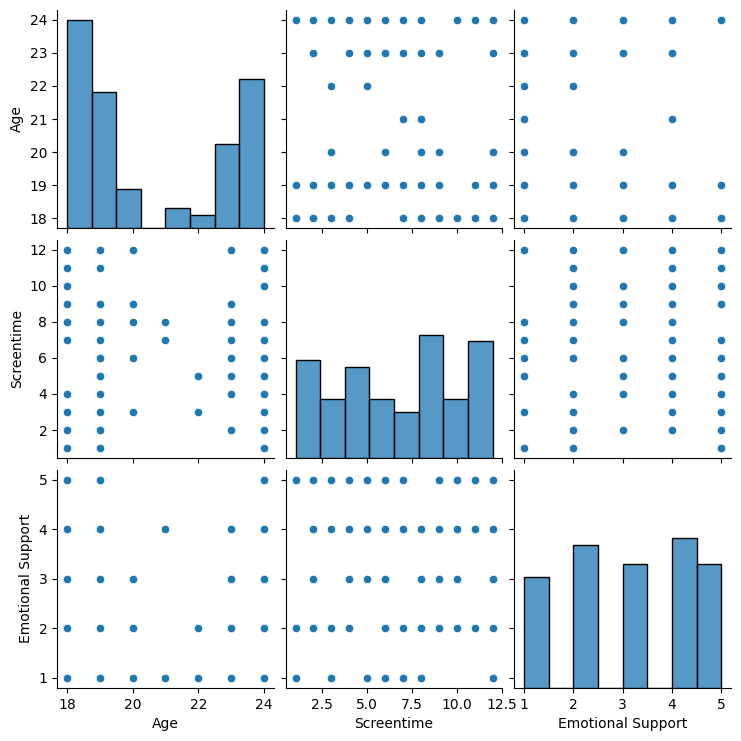

In [15]:
sns.pairplot(data)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

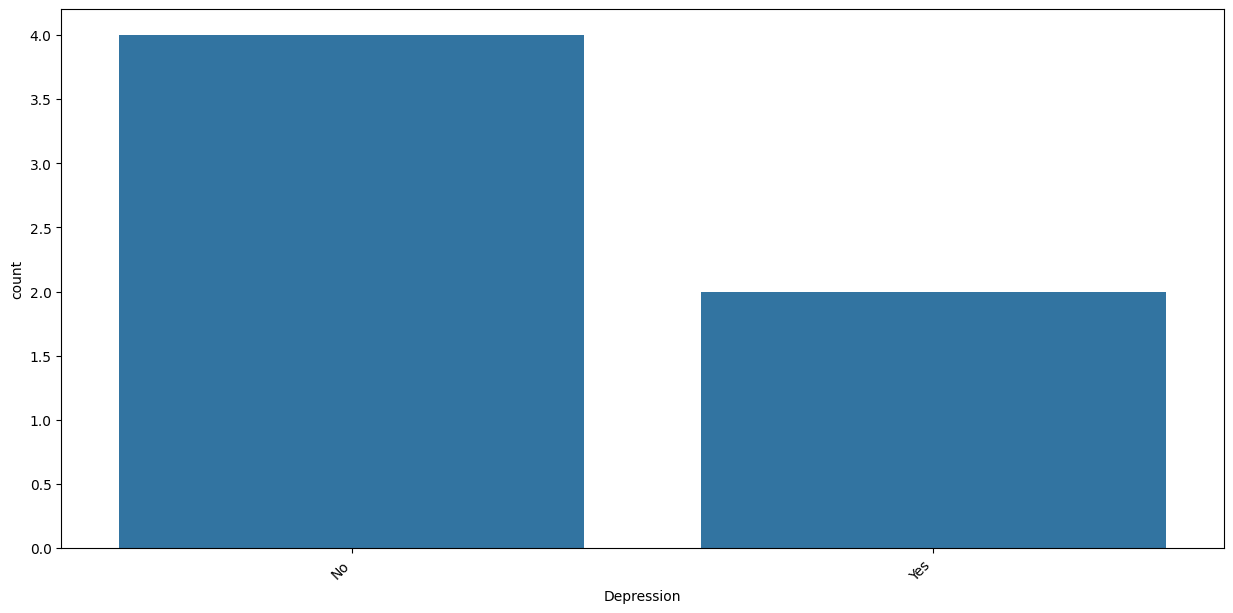

In [16]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Depression', data = data[data['Screentime'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, '18.0'),
 Text(1, 0, '19.0'),
 Text(2, 0, '20.0'),
 Text(3, 0, '22.0'),
 Text(4, 0, '23.0'),
 Text(5, 0, '24.0')]

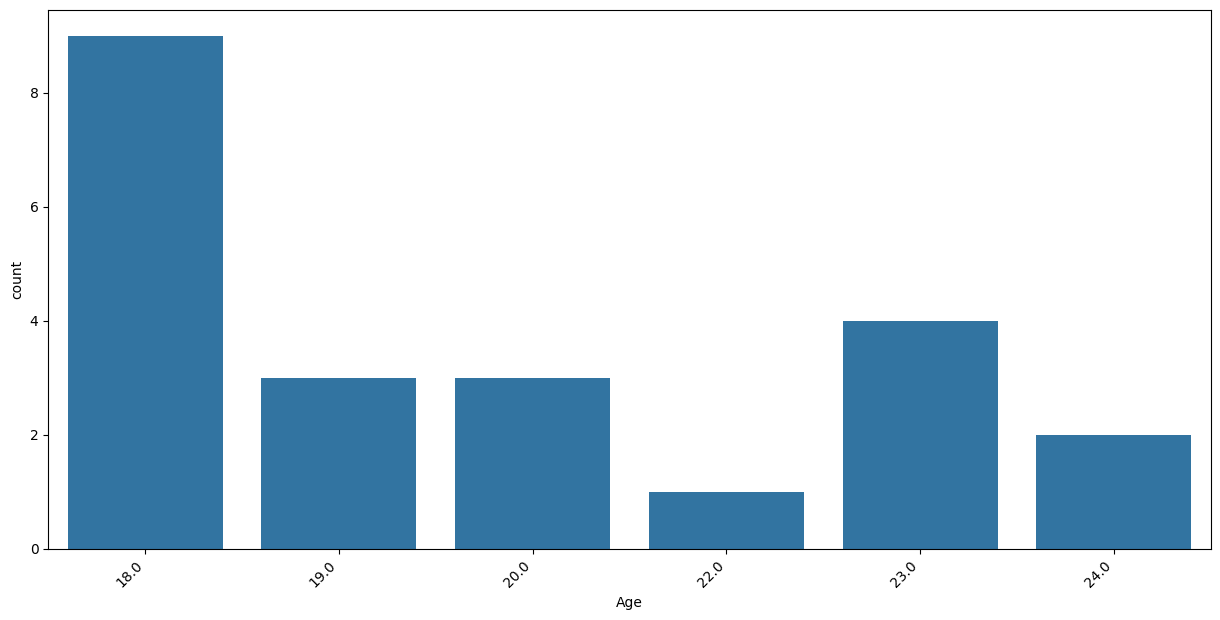

In [17]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Age', data = data[data['Emotional Support'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

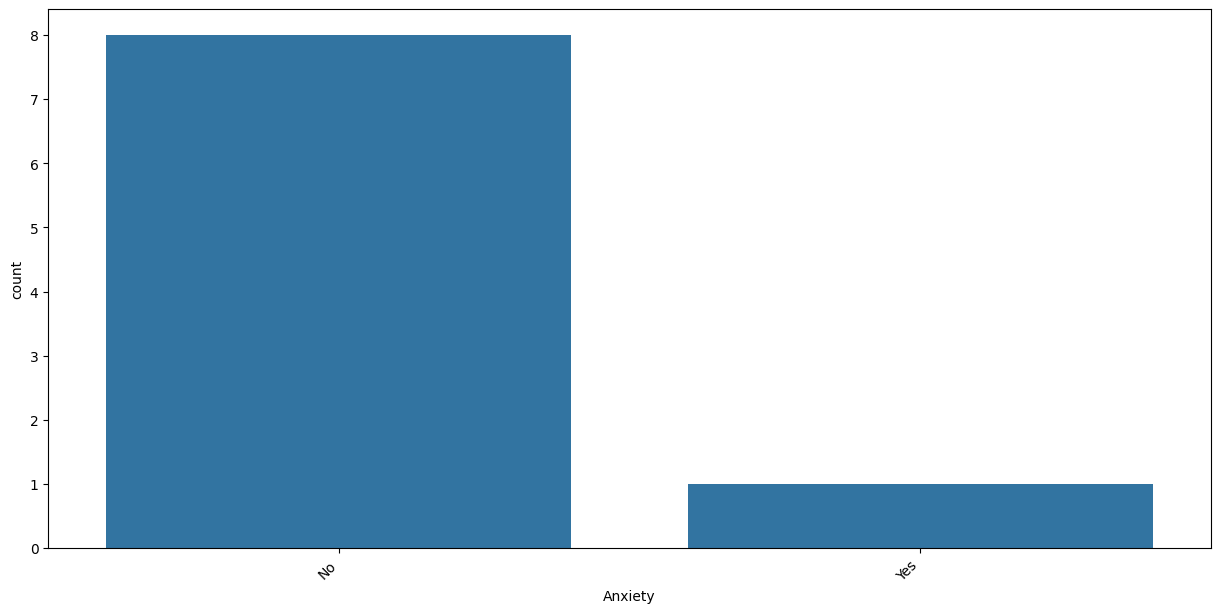

In [18]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Anxiety', data = data[data['Screentime'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'No')]

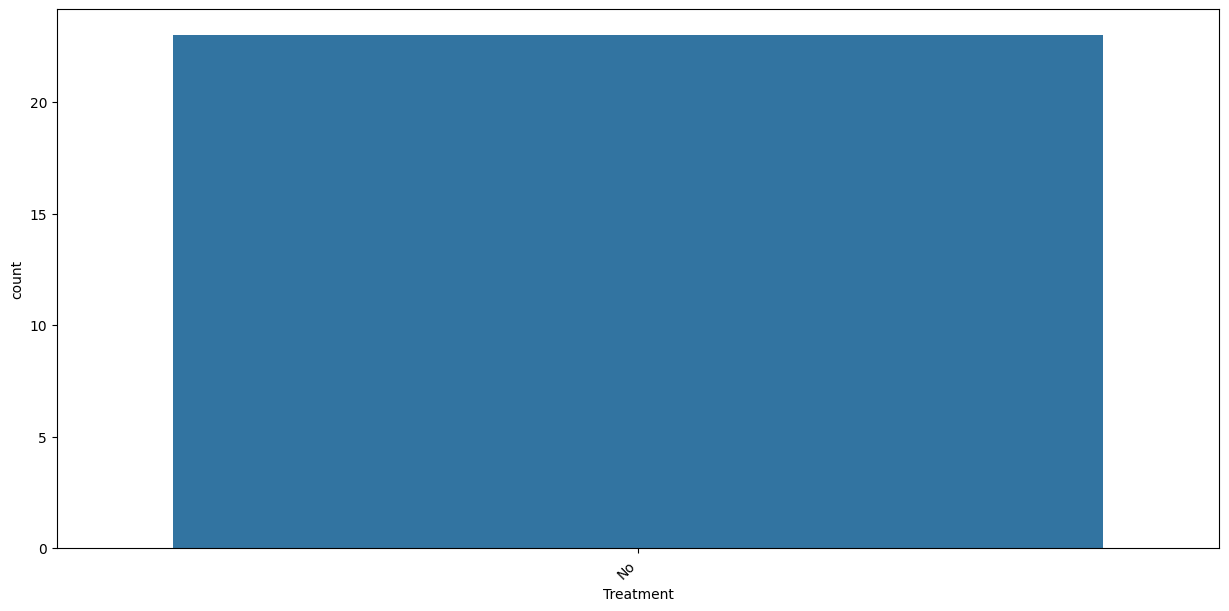

In [19]:
plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Treatment', data = data[data['Emotional Support'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Year-wise analysis of students from different courses¶
Here are some of the stats:
Maximum students from Year 4 are from Engineering.
Missing Courses from the Year 4 (x-axis) must have a course duration of 3 years.
Engineering, BCS and IT students rule the survey with maximum number of responses.

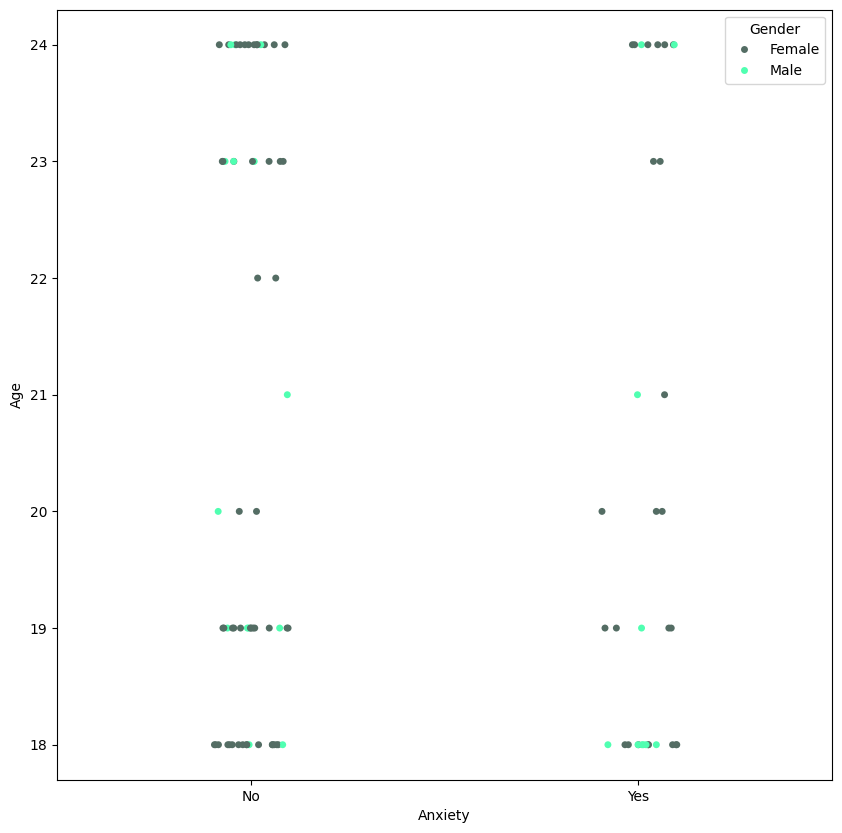

In [20]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Anxiety', y = 'Age', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()

Here are some of the stats:¶
Students enrolled in IT experience the maximum anxiety.
Students enrolled in fields related to Islam(Islamic Education, Pendidikan Islam, Fiqh, Usuluddin, etc.) and Biology(Human Sciences, Nursing, Biomedical Sciences) are less prone to anxiety.
Computer Science(BCS) has almost an equal number of students who experience anxiety and those who not

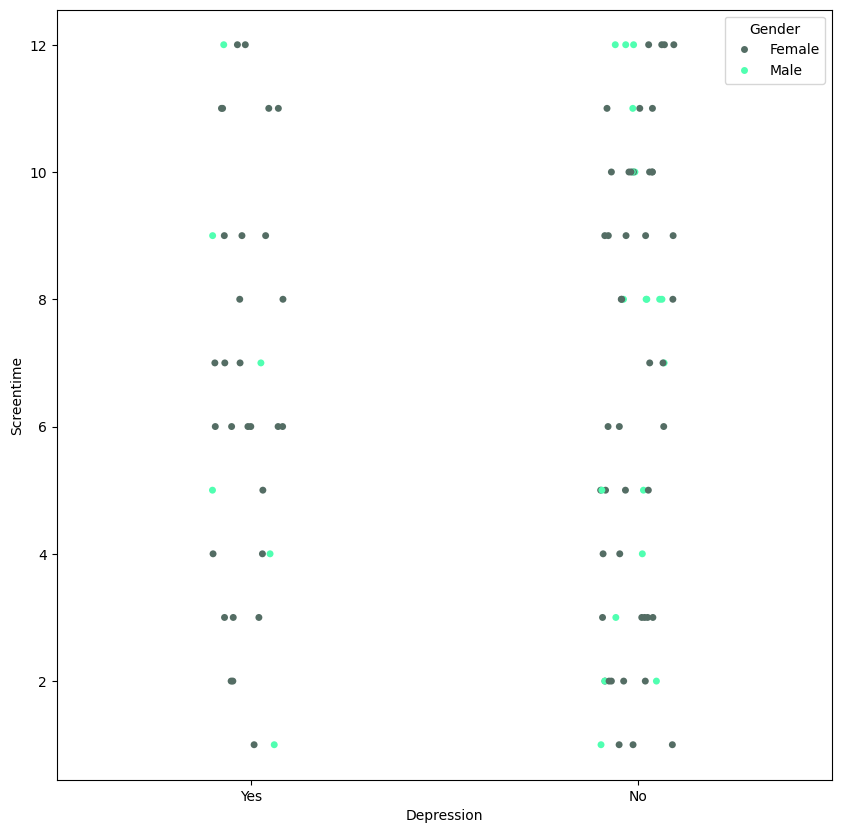

In [21]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Depression', y = 'Screentime', hue = 'Gender', data = data, palette = ['#546D64', '#50FFB1'])
plt.show()


Depression vs Course
Here are some of the stats:
Males are less prone to experiencing depression as compared to females.
2/3 females in Psychology experience depression,... Strange!
Around 50% of the Students in IT experience depression.

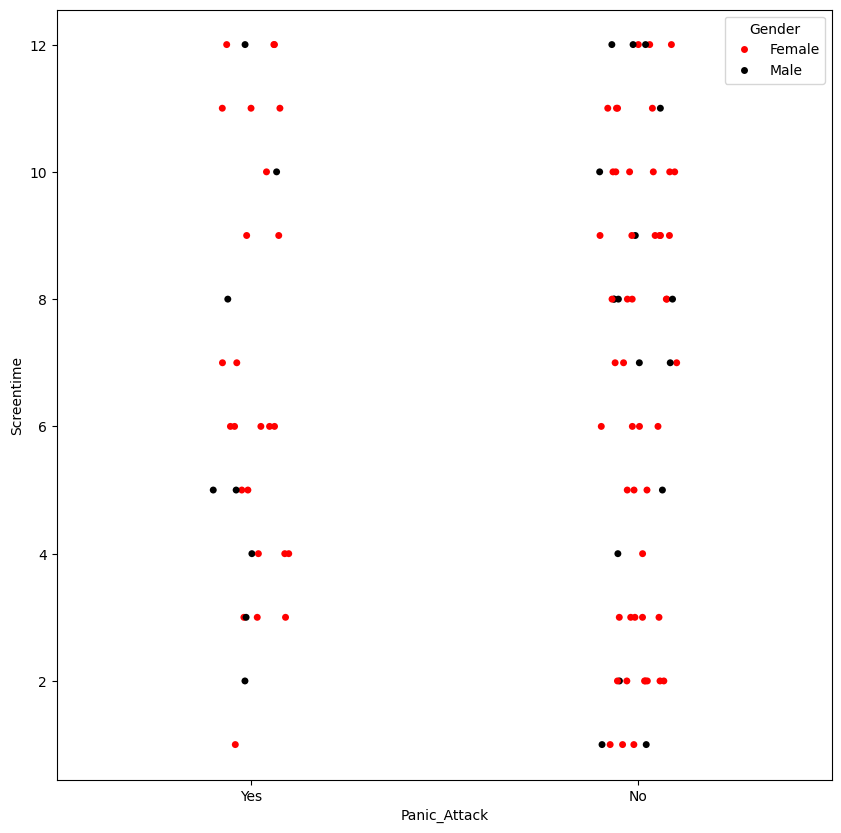

In [22]:
plt.figure(figsize=(10, 10))
sns.stripplot(x = 'Panic_Attack', y = 'Screentime', hue = 'Gender', data = data, palette = ['red', 'black'])
plt.show()

Panic Attack vs Course¶
Here are some of the stats:
Males are less prone to experiencing panic attacks as compared to females.
Approximately 37.5% of Engineering students experience panic attacks.
About 62.5% of IT students experience panic attacks.
About 18% of BCS students experience panic attacks.

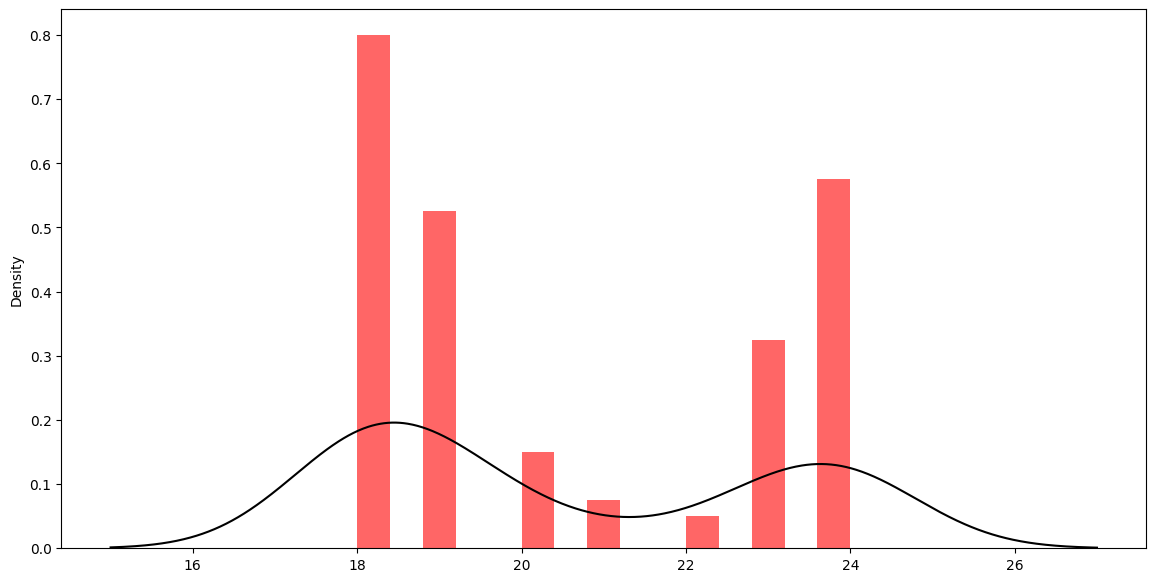

In [23]:
plt.figure(figsize=(14,7))
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
data["Age"].plot(kind='density', color='black')
plt.show()

Few Findings
We have students from ages between 18 - 24.
We do not have much responses from students aged 20-23.
Let's analyse various parameters(Depression, Anxiety, Panic_Attack) yearwise.

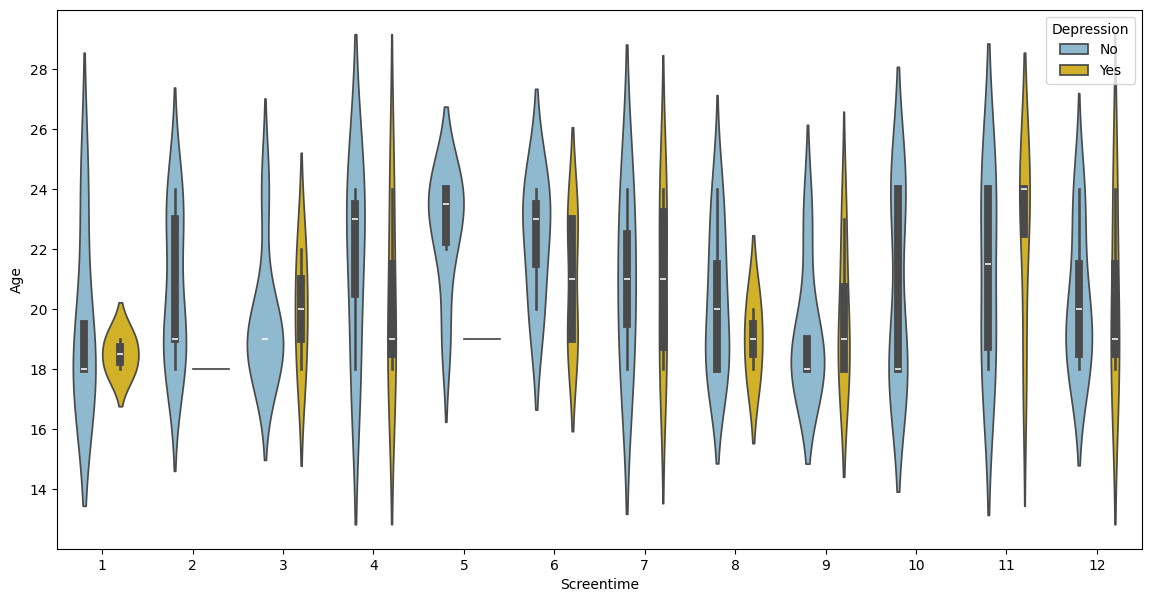

In [24]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Screentime', y = 'Age', data = data,  hue = 'Depression', palette = ['#84BCDA', '#ECC30B'])
plt.show()

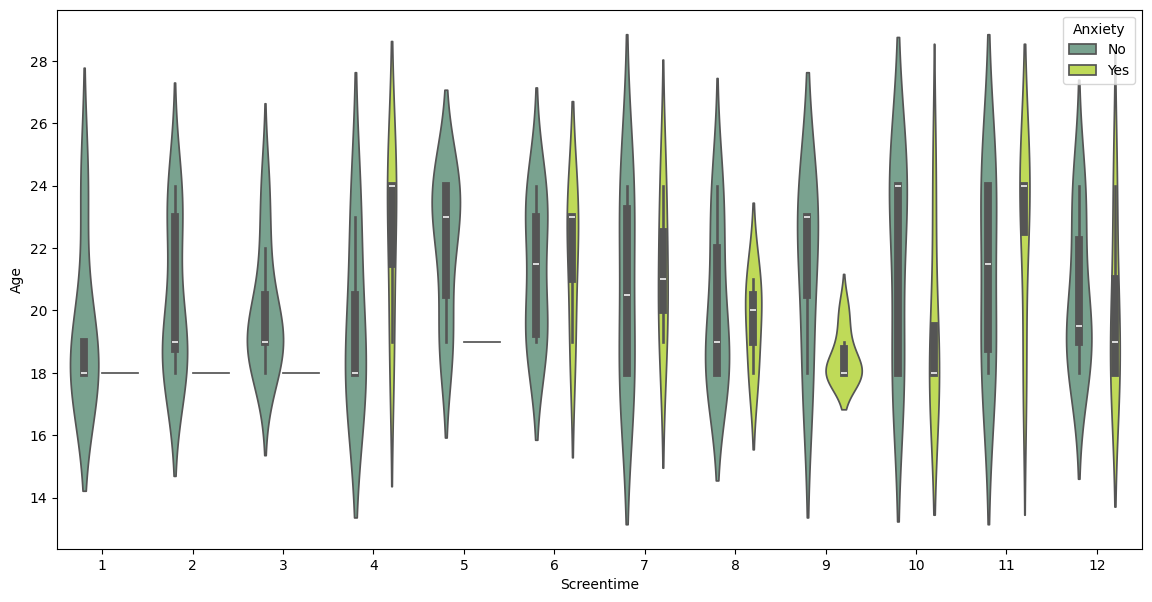

In [25]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Screentime', y = 'Age', data = data,  hue = 'Anxiety', palette = ['#72A98F', '#CBEF43'])
plt.show()

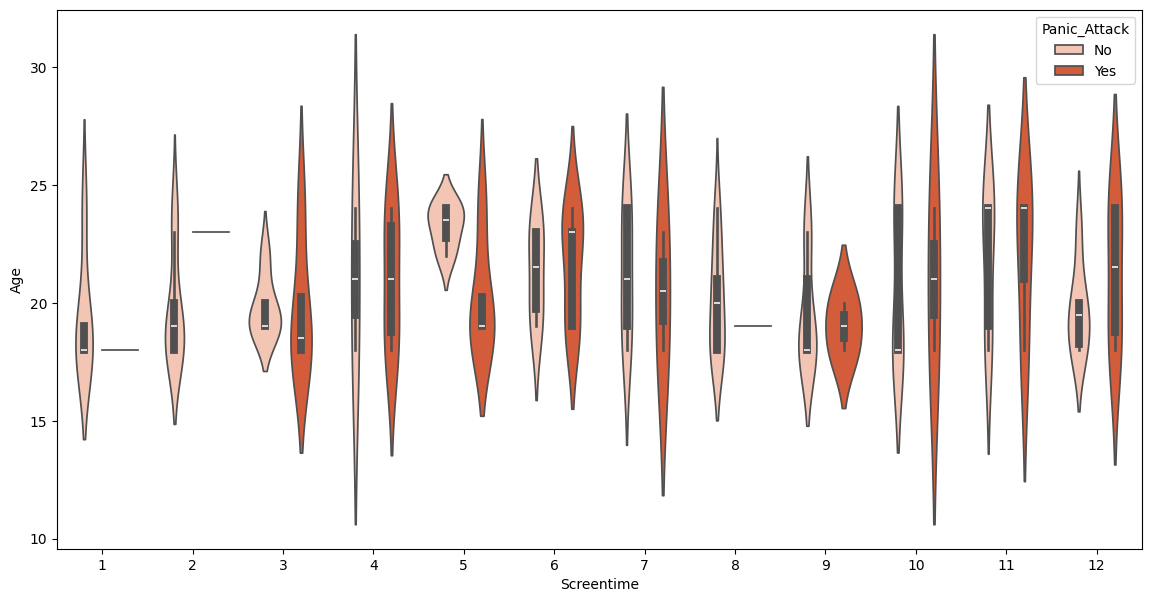

In [26]:
plt.figure(figsize=(14,7))
sns.violinplot(x = 'Screentime', y = 'Age', data = data,  hue = 'Panic_Attack', palette = ['#FEC0AA', '#EC4E20'])
plt.show()


Key Findings:
Year 4 students do not experience Depression, Anxiety or Panic Attacks except for those who are aged 24
Year 3 has a versatile distribution of students. Mixed reviews.
Year 1 students aged between 18 - 20 experience the most amongst depression, anxiety, panic attacks.
Year 3 students are more anxiety prone.

Does CGPA affect mental health? L

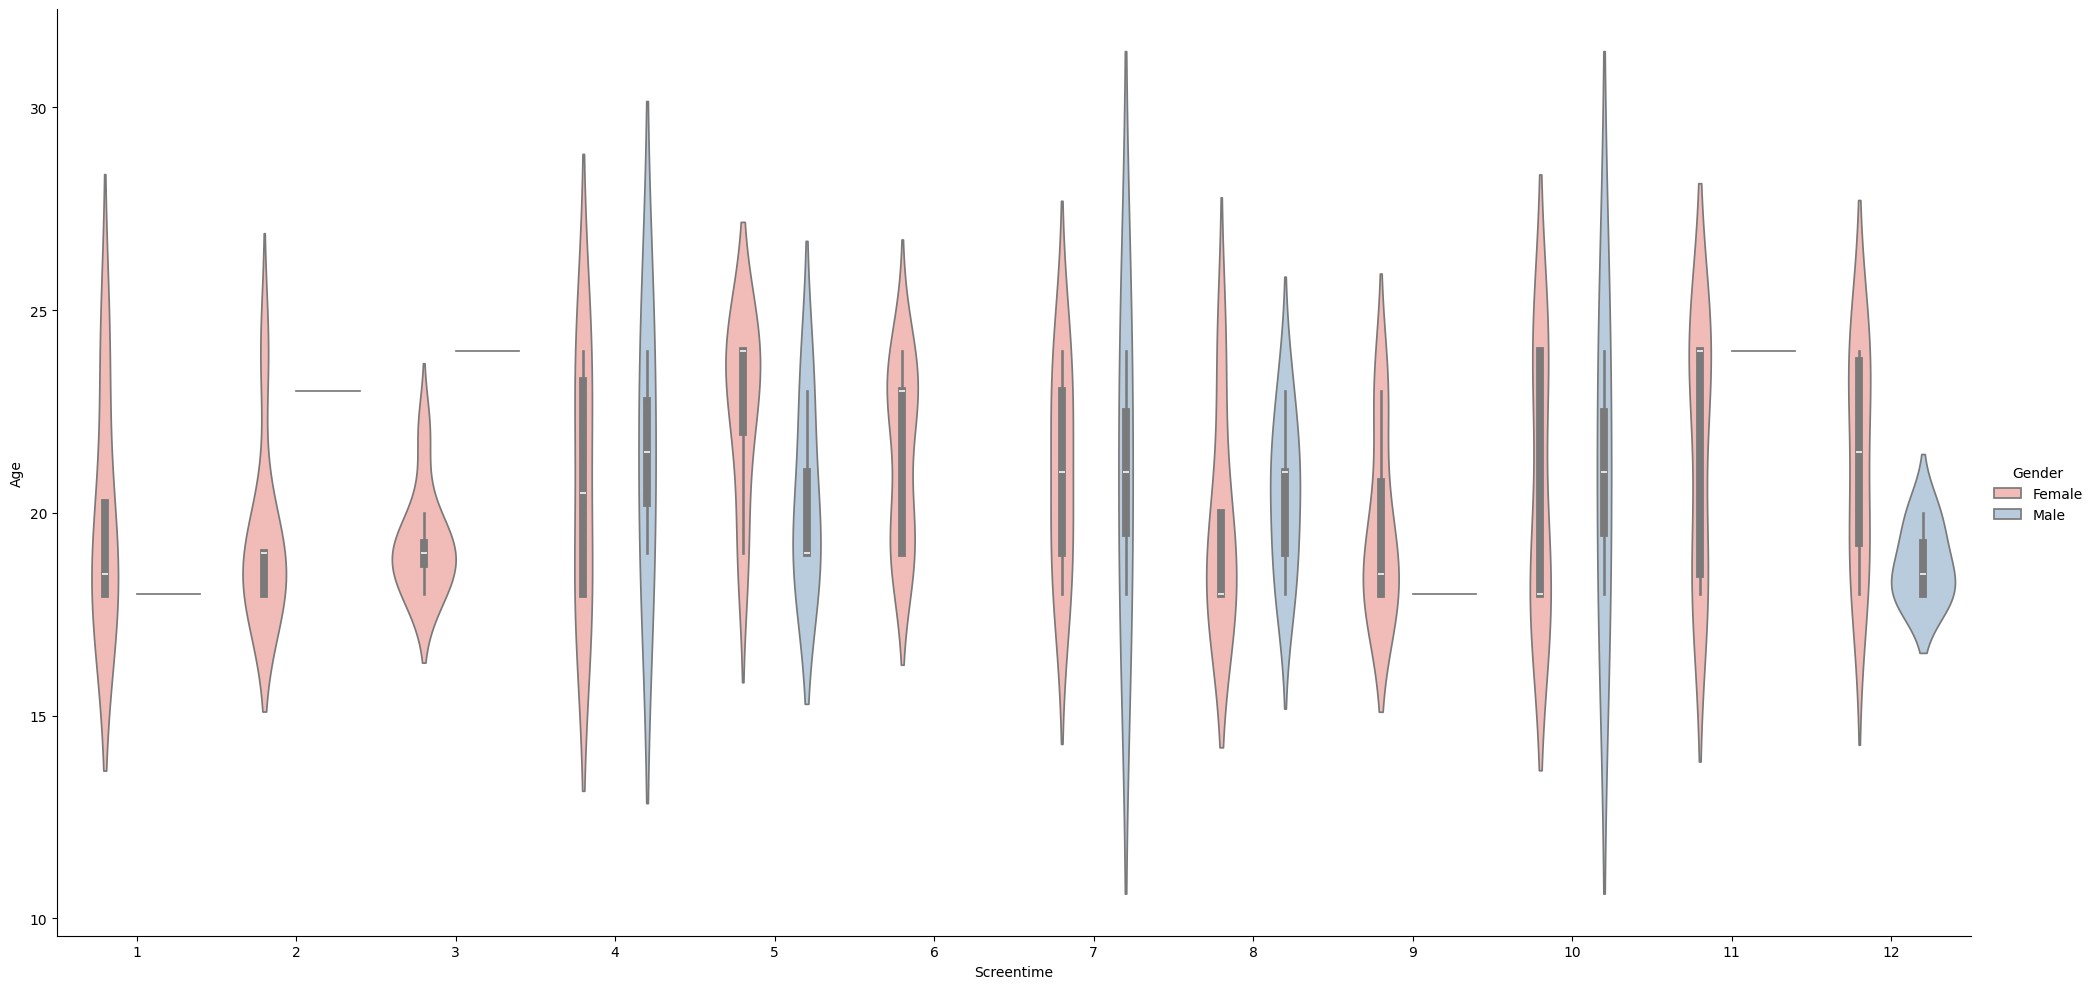

In [27]:
sns.catplot(data=data, x="Screentime", y="Age", hue="Gender", kind="violin", palette="Pastel1",height=10,aspect=2)

<Axes: >

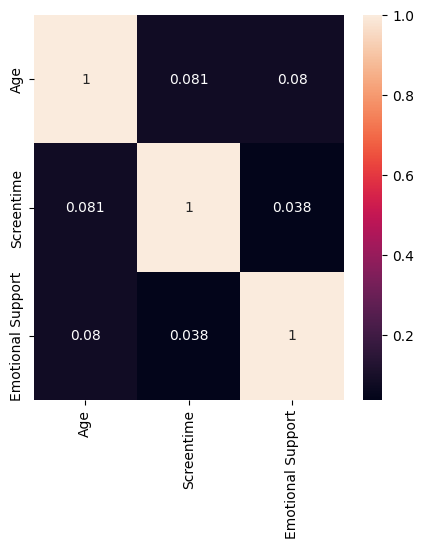

In [28]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat,annot=True, cmap=None)

Data Preprocessing
In this section,

The following steps are involved:
we will perform label encoding to the columns (CGPA, Depression, Anxiety, Panick_Attack) to get unique numerical value to each attribute.
I think we do not require Timestamp, so we'll drop it out.
Assigning labels and targets.
Splitting the test and training sets.

In [29]:
data.drop('Timestamp', axis=1, inplace=True)

In [30]:
data.head(10)

,Gender,Age,Screentime,Most used App,Emotional Support,Self Care,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,7,Youtube,4,No,Yes,No,Yes,No
1,Male,21.0,8,Youtube,4,Yes,No,Yes,No,No
2,Male,19.0,4,Chrome,4,No,Yes,Yes,Yes,No
3,Female,22.0,3,Youtube,2,Yes,Yes,No,No,No
4,Male,23.0,2,Chrome,4,No,No,No,No,No
5,Male,19.0,5,DOTA,1,No,No,No,Yes,No
6,Female,23.0,6,DOTA,3,Yes,Yes,No,Yes,No
7,Female,18.0,10,ChatGPT,4,No,No,Yes,No,No
8,Female,19.0,11,Youtube,4,No,No,No,No,No
9,Male,18.0,12,Netflix,3,No,No,Yes,Yes,No


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Screentime,Most used App,Emotional Support,Self Care,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,7,7,4,1,1,0,1,0
1,1,21.0,8,7,4,2,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,3,7,2,2,1,0,0,0
4,1,23.0,2,1,4,0,0,0,0,0


<Axes: >

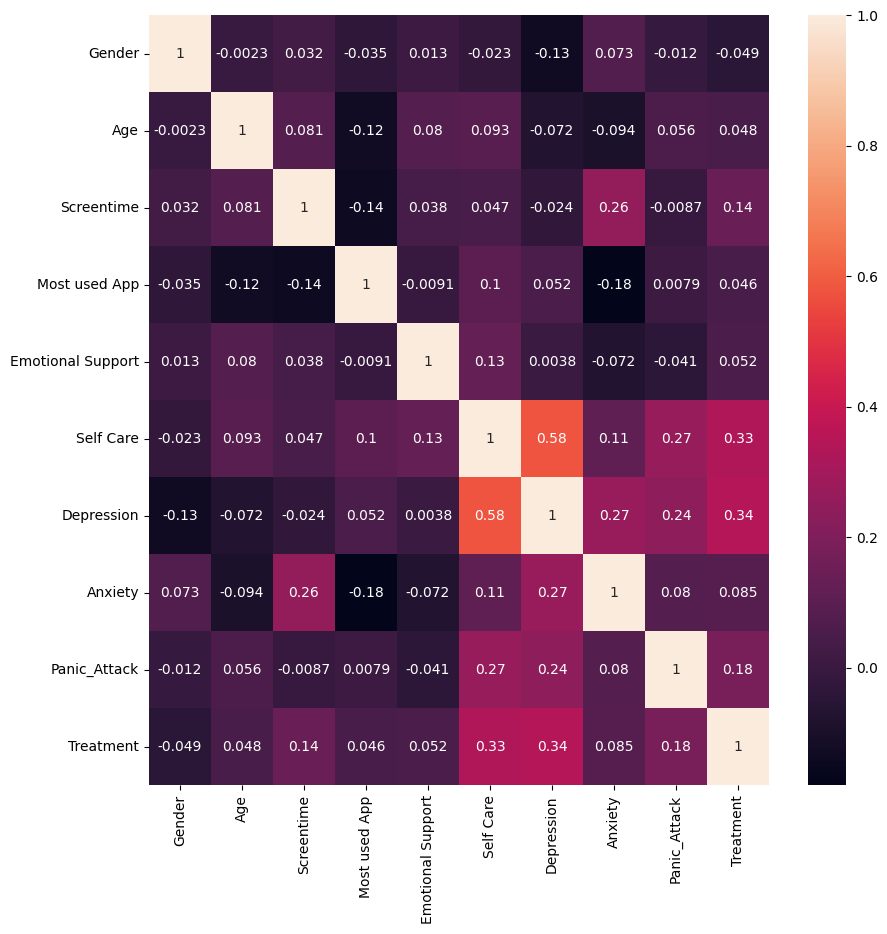

In [32]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, cmap=None)

Few Findings:
Marital_Status shows a close association with Depression.
Depression. Anxiety, Panick_Attack show a significant correlation.
Medical assistance(Treatment) shows a slight correlation with Marital_Status

For model selection, I will be building pipelines of five different classifiers and select one with the best fit results.

In this section:

Split data into trainig and testing sets
Assigning targets and features
The model pipelines with preprocessing:
Fitting the training set to the various models.
Getting the confusion matrix and accuracy scores.
Picking the best classifier.

In [33]:
X = data.drop(["Depression"],axis=1)
y = data["Depression"]


In [34]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.814286 
Decision Tree: 0.757143 
RandomForest: 0.842857 
SVC: 0.600000 


In [36]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.7666666666666667


In [37]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.7666666666666667

In [38]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.7666666666666667
Recall      :  0.7666666666666667
Precision   :  0.7358974358974358
F1 Score    :  0.7666666666666667


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        23
           1       0.50      0.29      0.36         7

    accuracy                           0.77        30
   macro avg       0.65      0.60      0.61        30
weighted avg       0.74      0.77      0.74        30



In [40]:
predicted_depression = ['Yes' if pred == 1 else 'No' for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display the results
print("Predicted Depression:")
print(predicted_depression)

Accuracy: 0.7666666666666667
Predicted Depression:
['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


<Axes: >

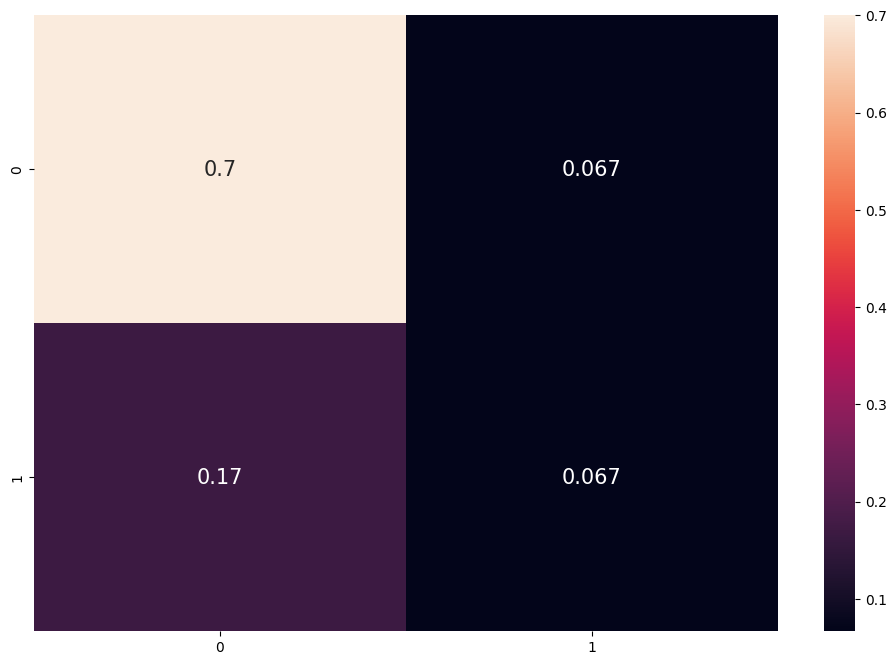

In [41]:
 #confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=None,annot = True, annot_kws = {'size':15})

In [42]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [44]:
## Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
## Prediction
y_pred=classifier.predict(X_test)

In [46]:
## Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [47]:
score

0.7666666666666667

Saving the trained model


In [48]:
import pickle

In [49]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [50]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [51]:
input_data = (1,18.0,7,7,4,1,1,0,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not in Depression')
else:
  print('The person is having Depression')

[1]
The person is having Depression


In [52]:
print("Shape of X:", X.shape)


Shape of X: (100, 9)


In [53]:
print("Feature Names:", X.columns)


Feature Names: Index(['Gender', 'Age', 'Screentime', 'Most used App', 'Emotional Support',
       'Self Care', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')


In [54]:
import sklearn
print(sklearn.__version__)


1.2.2


In [55]:
print("Number of Columns in X:", len(X.columns))


Number of Columns in X: 9


In [56]:
print("Column Names:", X.columns)


Column Names: Index(['Gender', 'Age', 'Screentime', 'Most used App', 'Emotional Support',
       'Self Care', 'Anxiety', 'Panic_Attack', 'Treatment'],
      dtype='object')


In [57]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [58]:
import numpy as np


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns= [x for x in data.columns if data.dtypes[x] == 'object']
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Screentime,Most used App,Emotional Support,Self Care,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,7,7,4,1,1,0,1,0
1,1,21.0,8,7,4,2,0,1,0,0
2,1,19.0,4,1,4,0,1,1,1,0
3,0,22.0,3,7,2,2,1,0,0,0
4,1,23.0,2,1,4,0,0,0,0,0


In [60]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifierses=RandomForestClassifier()
classifierses.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
## Prediction
y_pred=classifierses.predict(X_test)
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [62]:
score

0.7333333333333333

In [63]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("classifierses.pkl","wb")
pickle.dump(classifierses, pickle_out)
pickle_out.close()

In [64]:
import numpy as np
classifierses.predict([[1,20,4,7,1,1,1,0,1]])

array([1])